## Exploratory Data Analysis (EDA)

## Get to know the data

In [17]:
# print_function for compatibility with Python 3

from __future__ import print_function
print('Print function ready to serve.')

# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd

# Matplotlib for visualization
import matplotlib.pyplot as plt

# display plots in the notebook
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns

Print function ready to serve.


In [18]:
# Load employee data from CSV
df = pd.read_csv('../data/employee_data.csv')

In [19]:
df.shape

(14249, 10)

In [20]:
df.dtypes

avg_monthly_hrs        int64
department            object
filed_complaint      float64
last_evaluation      float64
n_projects             int64
recently_promoted    float64
salary                object
satisfaction         float64
status                object
tenure               float64
dtype: object

In [21]:
## numeric features
df.dtypes[df.dtypes != 'object']

avg_monthly_hrs        int64
filed_complaint      float64
last_evaluation      float64
n_projects             int64
recently_promoted    float64
satisfaction         float64
tenure               float64
dtype: object

In [22]:
## categorical features
df.dtypes[df.dtypes == 'object']

department    object
salary        object
status        object
dtype: object

In [23]:
df.head(5)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0


## Distributions of Numeric features

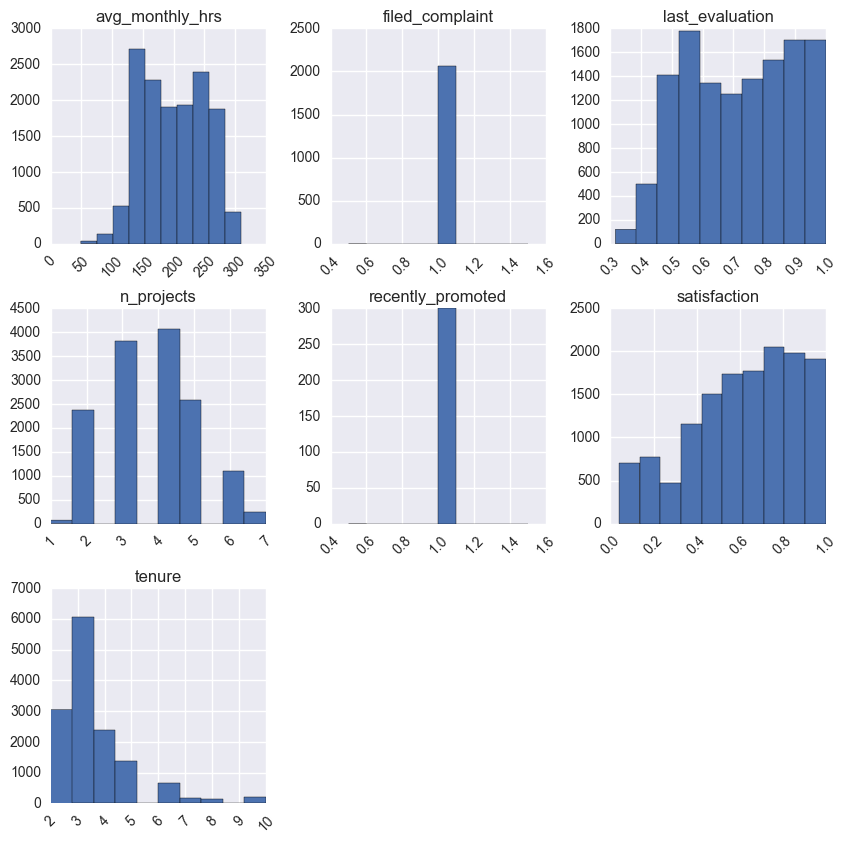

In [24]:
# Plot histogram grid
df.hist(figsize=(10,10), xrot=45)

# Clear the text "residue"
plt.show()

In [25]:
df.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
count,14249.000000,2058.0,12717.000000,14249.000000,300.0,14068.000000,14068.000000
mean,199.795775,1.0,0.718477,3.773809,1.0,0.621295,3.497228
std,50.998714,0.0,0.173062,1.253126,0.0,0.250469,1.460917
min,49.000000,1.0,0.316175,1.000000,1.0,0.040058,2.000000
25%,155.000000,NaN,NaN,3.000000,NaN,NaN,NaN
50%,199.000000,NaN,NaN,4.000000,NaN,NaN,NaN
75%,245.000000,NaN,NaN,5.000000,NaN,NaN,NaN
max,310.000000,1.0,1.000000,7.000000,1.0,1.000000,10.000000


## Distributions of Categorical features

In [26]:
# Summarize categorical features
df.describe(include=['object'])

,department,salary,status
count,13540,14249,14249
unique,12,3,2
top,sales,low,Employed
freq,3923,6952,10857


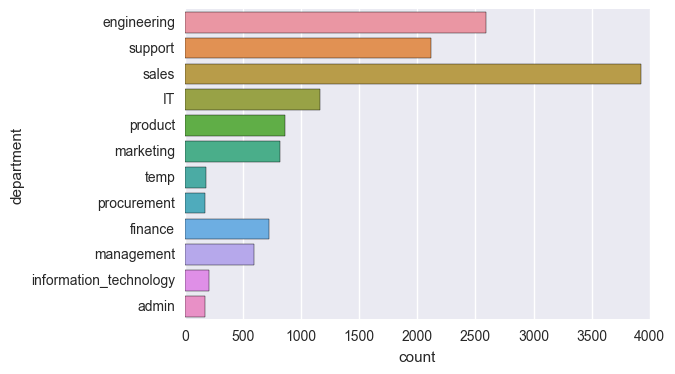

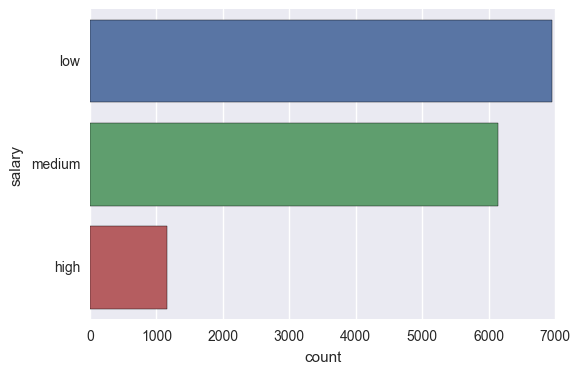

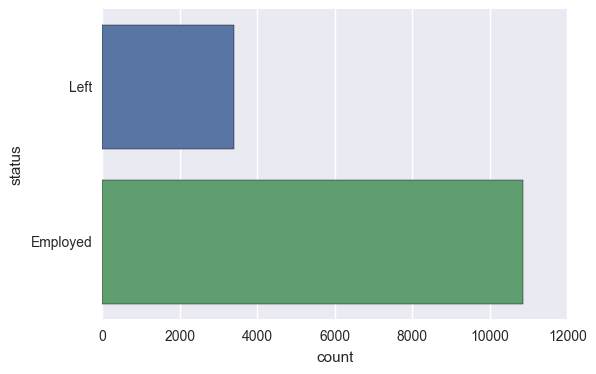

In [27]:
# Plot bar plot for each categorical feature
for feature in df.dtypes[df.dtypes=='object'].index:
    #print(feature)
    sns.countplot(y=feature, data=df)
    plt.show()

## Segmentations

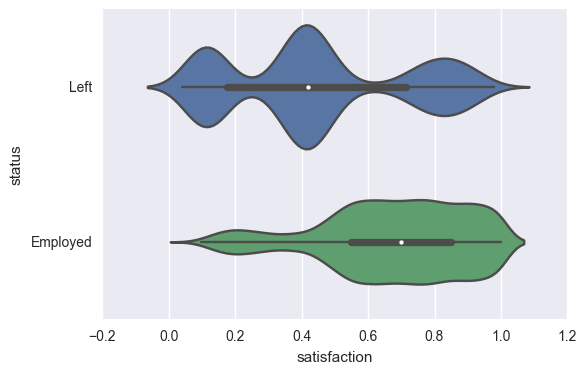

In [28]:
# Segment satisfaction by status and plot distributions
sns.violinplot(y='status', x='satisfaction', data=df)

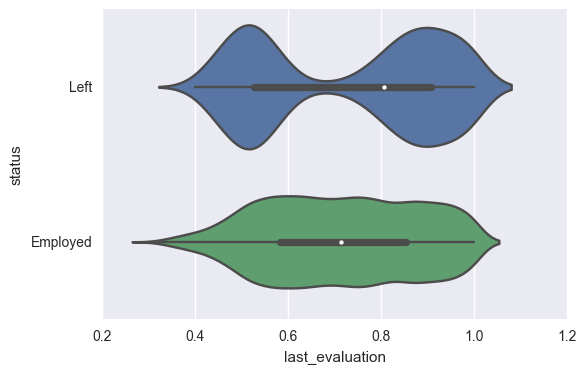

In [29]:
# Segment last_evaluation by status and plot distributions
sns.violinplot(y='status', x='last_evaluation', data=df)

In [30]:
# Segment by status and display the means within each class
df.groupby('status').mean()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
status,,,,,,,
Employed,197.700286,1.0,0.714479,3.755273,1.0,0.675979,3.380245
Left,206.502948,1.0,0.730706,3.833137,1.0,0.447500,3.869023


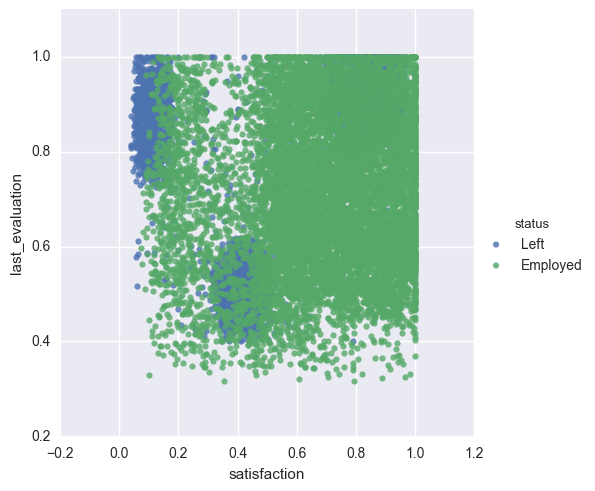

In [31]:
# Scatterplot of satisfaction vs. last_evaluation
sns.lmplot(x='satisfaction', y = 'last_evaluation', data=df, hue='status', fit_reg=False)

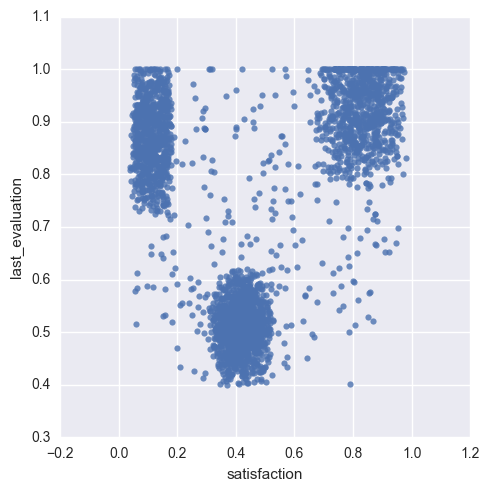

In [32]:
# Scatterplot of satisfaction vs. last_evaluation, only those who have left
sns.lmplot(x='satisfaction', y='last_evaluation', data=df[df.status == 'Left'], fit_reg=False)